## Modelos base sin la variable subject

En este notebook pretendo ver el impacto de la variable subject si los resultados mejoran o empeoran.

## Librerías 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

## Carga de datos

In [11]:
df=pd.read_csv('/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/data/processed/archivo.csv')

In [12]:
df

,title,text,subject,date,label,text_length,title_length,text_word_count,title_word_count,subject_grouped
0,U.S. budget fight loom Republicans flip fiscal...,WASHINGTON Reuters head conservative republica...,politicsNews,"December 31, 2017",1,3293,53,469,8,politics
1,U.S. military accept transgender recruit Monda...,WASHINGTON Reuters Transgender people allow fi...,politicsNews,"December 29, 2017",1,2930,56,397,7,politics
2,senior U.S. republican senator let Mr. Mueller...,WASHINGTON Reuters special counsel investigati...,politicsNews,"December 31, 2017",1,1939,50,272,8,politics
3,FBI Russia probe help australian diplomat tip NYT,WASHINGTON Reuters trump campaign adviser Geor...,politicsNews,"December 30, 2017",1,1755,49,241,8,politics
4,trump want Postal Service charge much Amazon s...,SEATTLE WASHINGTON Reuters President Donald Tr...,politicsNews,"December 29, 2017",1,3632,53,530,8,politics
...,...,...,...,...,...,...,...,...,...,...
44684,mcpain John McCain Furious Iran treat US Sailo...,21st Century Wire say 21wire report early week...,Middle-east,"January 16, 2016",0,2291,53,321,9,general
44685,justice Yahoo Settles E mail Privacy Class act...,21st Century Wire say familiar theme whenever ...,Middle-east,"January 16, 2016",0,1102,70,173,14,general
44686,Sunnistan US Allied safe zone plan take Territ...,Patrick Henningsen 21st Century WireRemember...,Middle-east,"January 15, 2016",0,16869,72,2402,11,general
44687,blow $ 700 million Al Jazeera America finally ...,21st Century Wire say Al Jazeera America go hi...,Middle-east,"January 14, 2016",0,1858,55,284,10,general


## Vectorización

In [13]:
from scipy.sparse import csr_matrix, hstack
# Eliminar Na
df['text'] = df['text'].fillna("")

# Vectoriza la columna 'text'
vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(df['text'])

# Vectoriza la columna 'title'
vectorizer_title = TfidfVectorizer(max_features=1000)
X_title = vectorizer_title.fit_transform(df['title'])


# Combina las tres fuentes de información en una única matriz de características
X = hstack([ X_title, X_text])

# Define la variable objetivo; en este ejemplo, se asume que la columna "label" es la etiqueta a predecir
y = df['label']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresión Logística

In [14]:

# Entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=500, solver='liblinear')  # Solver optimizado para datos grandes
logreg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Mostrar los resultados
conf_matrix_logreg, class_report_logreg

(array([[4609,   39],
        [  40, 4250]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      4648\n           1       0.99      0.99      0.99      4290\n\n    accuracy                           0.99      8938\n   macro avg       0.99      0.99      0.99      8938\nweighted avg       0.99      0.99      0.99      8938\n')

El modelo indica unos valores muy altos.
- Precisión= 0,99, lo que quiere decir un 99% de precisión 
- f1-score y Recall= Respectivamente estos indicadores muestran que tan bien el modelo encuentra todos los casos de una clase y el balance entre precisión y recall, en nuestro caso un 0,99

Los valores son bastante similares que cuando se realiza con subject transformada, aunque se equivoca un poco más con subject ( 2 valores más)

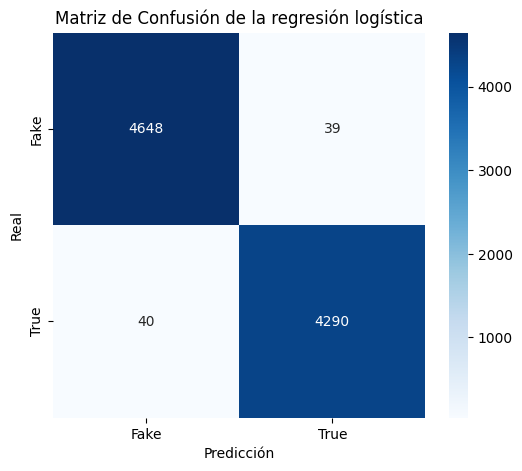

In [15]:
# Definir valores de la matriz de confusión
cm = np.array([[4648, 39],
               [40, 4290]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de la regresión logística')
plt.show();


In [16]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# 5. Evaluación del modelo
# Predicciones
y_train_pred_proba = logreg_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_proba = logreg_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba
y_test_pred = logreg_model.predict(X_test)

# Cálculo de log loss
log_loss_train = log_loss(y_train, y_train_pred_proba)
log_loss_test = log_loss(y_test, y_test_pred_proba)

log_loss_train, log_loss_test

(0.04418629696433559, 0.05169353377129033)

Los valores de log loss más bajos indican un mejor desempeño del modelo en términos de predicción de probabilidad
- los resultados comparado con subject y sin subject son similares pero son mejores en términos d epredicción el segundo modelo.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Aplicar Validación Cruzada (Usando 5 folds)
cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print(f"Scores por cada fold: {cv_scores}")
print(f"Precisión promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


Scores por cada fold: [0.98925934 0.98657418 0.98142761 0.98142761 0.98713215]
Precisión promedio: 0.9852
Desviación estándar: 0.0032


El modelo sin "subject" tiene una mayor precisión promedio (0.9852 vs. 0.9817), lo que sugiere que generaliza mejor en promedio.
También tiene una desviación estándar más baja (0.0033 vs. 0.0035), lo que indica que es un poco más estable en diferentes folds de validación cruzada.


## XG-Boost

In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric='logloss',   # Métrica de evaluación
    
    max_depth=6,             # Controla la complejidad del modelo
    learning_rate=0.1,       # Tasa de aprendizaje equilibrada
    n_estimators=300,        # Aumenta el número de árboles para mejorar el ajuste
    subsample=0.8,           # Reduce overfitting usando solo el 80% de los datos por árbol
    colsample_bytree=0.8,    # Usa el 80% de las características en cada árbol
    gamma=0.1,               # Ayuda a la regularización
    reg_lambda=1,            # Regularización L2 para evitar overfitting
    reg_alpha=0.1            # Regularización L1
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb, digits=4)

# Mostrar los resultados
conf_matrix, class_report


(array([[4640,    8],
        [  11, 4279]]),
 '              precision    recall  f1-score   support\n\n           0     0.9976    0.9983    0.9980      4648\n           1     0.9981    0.9974    0.9978      4290\n\n    accuracy                         0.9979      8938\n   macro avg     0.9979    0.9979    0.9979      8938\nweighted avg     0.9979    0.9979    0.9979      8938\n')

###  Interpretación 

- El modelo tiene un rendimiento excepcionalmente alto con un accuracy del 99.80%, lo que significa que casi todas las predicciones son correctas.
- Muy pocas predicciones erróneas: Solo 18 de 8938 casos fueron clasificados incorrectamente (8 falsos positivos y 10 falsos negativos).
- Equilibrio entre precisión y recall:
La precisión (qué tan confiables son las predicciones positivas) es 99.81% en la clase 1.
El recall (qué tan bien detecta los positivos reales) es 99.77% en la clase 1.
Valores similares en ambas clases indican que el modelo no tiene sesgo significativo hacia una clase.

### Comparación con subject 
Los resultados de XGBoost con y sin "subject" son idénticos en términos de matriz de confusión y métricas de clasificación:

Precisión, recall, f1-score, accuracy: 0.9980 en ambos casos
Matriz de confusión: Exactamente igual
Macro avg y weighted avg: También idénticos


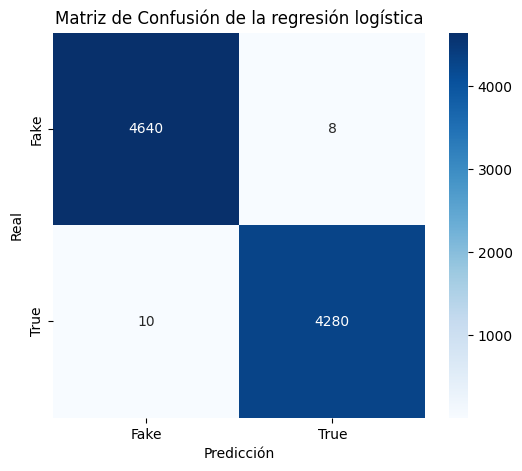

In [19]:
# Definir valores de la matriz de confusión
cm = np.array([[4640, 8],
               [10, 4280]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de la regresión logística')
plt.show();


- 4640 noticias fueron correctamente clasificados como falsas.
- 4280 noticias  fueron correctamente clasificados como verdaderas.
- 8 noticias fueron incorrectamente clasificados como verdaderas(falsos positivos, eran falsas y clasificaron como verdaderas).
- 10 noticias fueron incorrectamente clasificados como clase 0 (falsos negativos, eran verdaderas y clasificaron como falsas).

In [20]:
# Calcular las probabilidades predichas para calcular log loss
y_train_pred_probaxgb = xgb_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_probaxgb = xgb_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba

# Calcular log loss en entrenamiento y prueba
log_loss_train = log_loss(y_train, y_train_pred_probaxgb)
log_loss_test = log_loss(y_test, y_test_pred_probaxgb)

# Mostrar los resultados
log_loss_train, log_loss_test


(0.0004380706018875895, 0.00876371694136463)

El log loss en entrenamiento es extremadamente bajo (0.0006), lo que indica que el modelo memoriza muy bien los datos de entrenamiento.
El log loss en prueba es un poco mayor (0.0104), pero sigue siendo muy bajo.
La diferencia entre ambos (0.0098) es pequeña, lo que sugiere que no hay un overfitting grave.
El modelo generaliza bien, ya que la diferencia entre entrenamiento y prueba no es demasiado grande.

### Comparación con subject
El modelo con "subject" tiene valores de log loss ligeramente más bajos, lo que sugiere que hace predicciones de probabilidad un poco más confiables.
La diferencia es mínima y probablemente no tenga un impacto significativo en la práctica.

In [21]:
# Ejecutar validación cruzada
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print(f"Precisión promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")

Precisión promedio: 0.9965
Desviación estándar: 0.0016


1. Precisión promedio: 0.9965 (99.65%)

    Esto significa que, en promedio, el modelo clasifica correctamente el 99.65% de los casos en los distintos folds de validación cruzada.
    Un valor cercano al 100% indica un modelo altamente preciso, con muy pocas clasificaciones erróneas.
    Este nivel de precisión sugiere que el modelo generaliza bien a datos nuevos.

2. Desviación estándar: 0.0016 (0.16%)
    La desviación estándar mide qué tanto varía la precisión entre diferentes pruebas (folds) de validación cruzada.
    Un valor bajo (0.0016) indica que el modelo tiene rendimiento muy estable, sin grandes fluctuaciones en la precisión entre distintas particiones de los datos.
    Esto significa que el modelo no depende demasiado de una partición específica del dataset, lo que es una señal de buena generalización y baja varianza.


### Comparación con Subject
El modelo sin "subject" tiene una precisión promedio más alta (0.9965 vs. 0.9817), lo que indica que es significativamente mejor en términos de clasificación.
También tiene una desviación estándar más baja (0.0016 vs. 0.0035), lo que significa que su rendimiento es más estable en diferentes particiones de los datos.
El modelo con "subject" tiene un rendimiento inferior y más variable, lo que sugiere que la inclusión de esta característica no aporta valor al modelo y podría introducir ruido.
Conclusión

## Gradient boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Mostrar los resultados
conf_matrix_gb, class_report_gb

(array([[4623,   25],
        [  16, 4274]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      4648\n           1       0.99      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

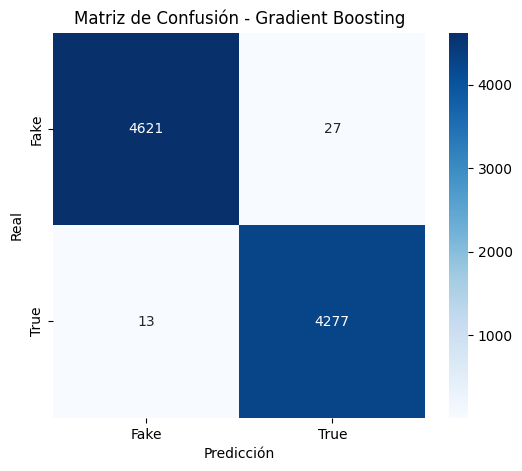

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión para Gradient Boosting
plt.figure(figsize=(6, 5))
sns.heatmap([[4621, 27], [13, 4277]], annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()


### Diferencias con subject
- Parece que sin subject parece que realiza menos falsos negativos, por lo que detecta mejor las noticias verdaderas(13 vs 17), a la inversa si se incluye subject(25 vs 27). Las diferencias son minimas.

## NP-Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
# Entrenamiento
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4456  192]
 [ 249 4041]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4648
           1       0.95      0.94      0.95      4290

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



- 4455 ejemplos fueron correctamente clasificados como negativos (clase 0).
- 4041 ejemplos fueron correctamente clasificados como positivos (clase 1).
- 193 ejemplos fueron erróneamente clasificados como positivos cuando eran negativos (falsos positivos).
- 249 ejemplos fueron erróneamente clasificados como negativos cuando eran positivos (falsos negativos).

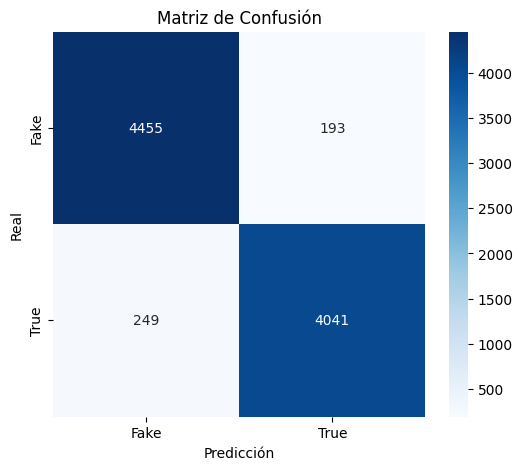

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Definir valores de la matriz de confusión
cm = np.array([[4455, 193],
               [249, 4041]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show();


### Comparación con Subject

- Ambos modelos tienen la misma precisión (95%), recall (95%) y f1-score (95%).
- La diferencia en la matriz de confusión es mínima:
- El modelo sin "subject" tiene 1 menos falso negativo (249 vs. 250).
- El modelo con "subject" tiene 2 menos falsos positivos (191 vs. 193).


# Random Forest


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Mostrar los resultados
conf_matrix_rf, class_report_rf


(array([[4644,    4],
        [   9, 4281]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4648\n           1       1.00      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

- Precisión: El modelo predice con 100% de exactitud en ambas clases.
- Recall: Detecta correctamente casi todos los casos positivos y negativos.
- F1-score: Indica un equilibrio perfecto entre precisión y recall.
- Accuracy: 100% de las predicciones fueron correctas.


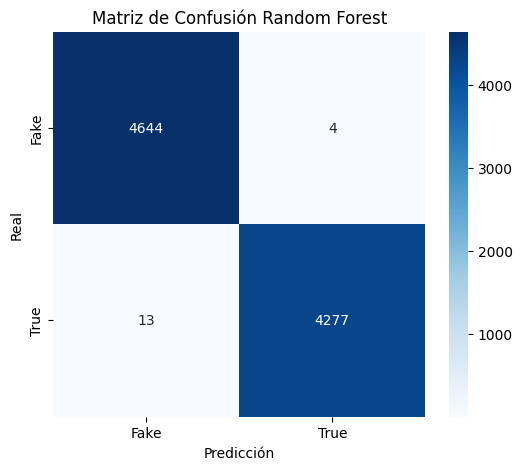

In [27]:
# Definir valores de la matriz de confusión
cm = np.array([[4644, 4],
               [13, 4277]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Random Forest')
plt.show();


- 4644 noticias fueron correctamente clasificados como negativos (noticias falsas).
- 4277 noticias fueron correctamente clasificados como positivos (noticias verdaderas).
- 4 noticias fueron erróneamente clasificados como verdaderas cuando eran falsas (falsos positivos).
- 13 ejemplos fueron erróneamente clasificados como falsas cuando eran verdaderas (falsos negativos).


### comparacion con subject

- Los resultados practicamente iguales, la unica diferencia es que al incluir subject sube los falsos negativps de 13 a 16. 
- Los falsos positivos son idénticos
- Ambos muestran un accuracy de 1

## Comparación de modelos

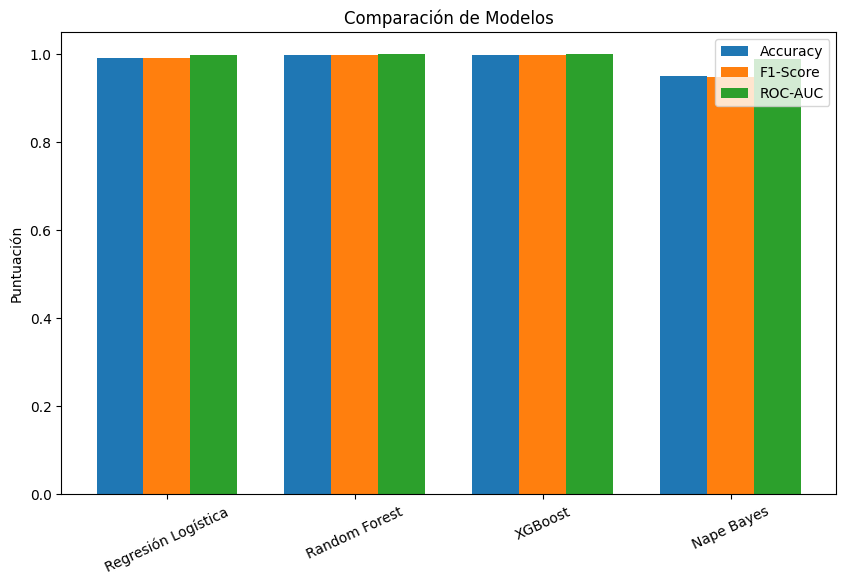

In [28]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# 📊 Evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    
    return [acc, f1, auc]

# Guardar resultados en un diccionario
resultados = {
    "Regresión Logística": evaluar_modelo(logreg_model, "Regresión Logística"),
    "Random Forest": evaluar_modelo(rf_model, "Random Forest"),
    "XGBoost": evaluar_modelo(xgb_model, "XGBoost"),
  
    "Nape Bayes":evaluar_modelo (model,"NPB")
}

# 📊 Graficar resultados
metricas = ["Accuracy", "F1-Score", "ROC-AUC"]
valores = np.array(list(resultados.values()))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
indices = np.arange(len(resultados))

# Crear barras para cada métrica
for i, metric in enumerate(metricas):
    ax.bar(indices + i * bar_width, valores[:, i], width=bar_width, label=metric)

# Etiquetas y formato
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(resultados.keys(), rotation=25)
ax.set_ylabel("Puntuación")
ax.set_title("Comparación de Modelos")
ax.legend()

# Mostrar gráfico
plt.show()

### Conclusión Respecto subject 
aunque en lo sgráficos de importancia relativa que hay en el notebook de subject indica que tiene cierta importancia, la importancia es baja, sin embargo la incluire ya que no afecta negativamente y en algunos casos hay una pequeña mejora.


In [ ]:
xx

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [45]:
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "precision": "precision",
    "recall": "recall",
    "roc_auc": "roc_auc"
}


In [46]:
# Importaciones necesarias
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

# Opción 1: Usar cross_validate en lugar de cross_val_score
# cross_validate es más eficiente porque calcula todas las métricas en una sola pasada
def evaluate_models_efficiently(models, X, y, kf, scoring):
    results = []
    for name, model in models.items():
        # Calcula todas las métricas de una vez
        cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring)
        
        # Calcula promedios para cada métrica
        scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}
        scores["Model"] = name
        results.append(scores)
        print(f"Modelo {name} evaluado")
    
    return pd.DataFrame(results)

# Opción 2: Procesamiento paralelo
def evaluate_model(name, model, X, y, kf, scoring):
    scores = {metric: cross_val_score(model, X_final, y, cv=kf, scoring=scoring[metric]).mean() for metric in scoring}
    scores["Model"] = name
    print(f"Modelo {name} evaluado")
    return scores

def evaluate_models_parallel(models, X, y, kf, scoring, n_jobs=-1):
    results = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_model)(name, model, X, y, kf, scoring) 
        for name, model in models.items()
    )
    return pd.DataFrame(results)

# Usar una de las dos opciones:
# Opción 1
results_df = evaluate_models_efficiently(models, X, y, kf, scoring)

# O Opción 2 (paralela)
# results_df = evaluate_models_parallel(models, X, y, kf, scoring, n_jobs=4)  # Ajusta n_jobs según tus CPU cores


Modelo logistic Regresion evaluado
Modelo Random forest evaluado
Modelo XGBoost evaluado
Modelo Gradient Boosting evaluado
Modelo Nape Bayes evaluado


In [47]:
results_df.set_index('Model')

,accuracy,f1,precision,recall,roc_auc
Model,,,,,
logistic Regresion,0.992414,0.992019,0.990730,0.993314,0.999515
Random forest,0.998076,0.997972,0.997875,0.998069,0.999948
XGBoost,0.997919,0.997808,0.997360,0.998257,0.999948
Gradient Boosting,0.995860,0.995648,0.993660,0.997646,0.999084
Nape Bayes,0.948824,0.945666,0.953306,0.938157,0.988990
